In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data collection

In [2]:
df=pd.read_excel("online_retail_II.xlsx")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

# Data Cleaning

In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
x=df['Customer ID'].mean()
df.fillna({"Customer ID":x},inplace=True)

In [9]:
df['Description']=df['Description'].astype('category')

In [10]:
mode_value=df['Description'].mode()[0]
df.fillna({'Description':mode_value},inplace=True)

In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [13]:
df.duplicated().sum()

np.int64(6865)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
df['Year']=df['InvoiceDate'].dt.year

In [19]:
df['Month']=df['InvoiceDate'].dt.month

In [20]:
df['Day']=df['InvoiceDate'].dt.day

In [21]:
df['Hour']=df['InvoiceDate'].dt.hour

In [22]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,1


# Outliers Analysis

In [24]:
df=df[(df['Quantity']>0) & (df['Price']>0)] # quantity and price must be grater then 0

In [25]:
# IQR fo Quantity
q1=df['Quantity'].quantile(0.25)
q3=df["Quantity"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df['Quantity']>lower_bound)|(df['Quantity']<upper_bound)]

In [26]:
# IQR fo Price
q1=df['Price'].quantile(0.25)
q3=df["Price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df['Price']>lower_bound)|(df['Price']<upper_bound)]

In [27]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,DayOfWeek
count,504731.000000,504731,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000
mean,11.516923,2010-06-28 17:28:10.990130944,4.274692,15361.359247,2009.913909,7.446477,15.261218,12.974155,2.494705
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,2009.000000,1.000000,1.000000,7.000000,0.000000
25%,1.000000,2010-03-21 14:06:00,1.250000,14379.000000,2010.000000,4.000000,8.000000,11.000000,1.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15360.645478,2010.000000,8.000000,15.000000,13.000000,2.000000
75%,12.000000,2010-10-15 13:37:00,4.210000,16456.000000,2010.000000,11.000000,23.000000,15.000000,4.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,2010.000000,12.000000,31.000000,20.000000,6.000000
std,87.337497,NaN,64.093333,1497.856548,0.280499,3.541718,8.696201,2.421977,1.918765


# Feature engineering


In [28]:
df['TotalSales']=df['Quantity']*df['Price']

In [29]:
# lets do IQR  for total sales also 
# IQR fo TotalSales
q1=df['TotalSales'].quantile(0.25)
q3=df["TotalSales"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df['TotalSales']>lower_bound)|(df['TotalSales']<upper_bound)]

In [30]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,DayOfWeek,TotalSales
count,504731.000000,504731,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000,504731.000000
mean,11.516923,2010-06-28 17:28:10.990130944,4.274692,15361.359247,2009.913909,7.446477,15.261218,12.974155,2.494705,20.351705
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,2009.000000,1.000000,1.000000,7.000000,0.000000,0.001000
25%,1.000000,2010-03-21 14:06:00,1.250000,14379.000000,2010.000000,4.000000,8.000000,11.000000,1.000000,4.200000
50%,3.000000,2010-07-06 14:25:00,2.100000,15360.645478,2010.000000,8.000000,15.000000,13.000000,2.000000,10.200000
75%,12.000000,2010-10-15 13:37:00,4.210000,16456.000000,2010.000000,11.000000,23.000000,15.000000,4.000000,17.700000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,2010.000000,12.000000,31.000000,20.000000,6.000000,25111.090000
std,87.337497,NaN,64.093333,1497.856548,0.280499,3.541718,8.696201,2.421977,1.918765,91.510976


In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,DayOfWeek,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,1,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,1,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,1,30.0


In [32]:
df['Description']=df['Description'].str.strip().str.title()

In [33]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,DayOfWeek,TotalSales
0,489434,85048,15Cm Christmas Glass Ball 20 Lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,1,83.4
1,489434,79323P,Pink Cherry Lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1,81.0
2,489434,79323W,White Cherry Lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1,81.0


# Calculate RFM

In [34]:
import datetime as dt
snapshot_date=df['InvoiceDate'].max()+ dt.timedelta(days=1)

In [35]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                   # Frequency
    'TotalSales': 'sum'                                     # Monetary
})

In [36]:
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'Invoice': 'Frequency',
                    'TotalSales': 'Monetary'}, inplace=True)


In [37]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


In [38]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply IQR to each RFM feature
for col in ['Recency', 'Frequency', 'Monetary']:
    rfm = remove_outliers_iqr(rfm, col)


In [39]:
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93
...,...,...,...
18283.0,18,6,619.37
18284.0,67,1,461.68
18285.0,296,1,427.00


# Normalization or Standarization

if the data set  gaussian then do Satndarization else do Normalization

In [40]:
from scipy.stats import shapiro
stat,p=shapiro(rfm)
if p>0.5:
    print("the set is Gaussian")
else :
    print("the data set is not Gaussian")

the data set is not Gaussian


C:\Users\surje\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10737.
  res = hypotest_fun_out(*samples, **kwds)


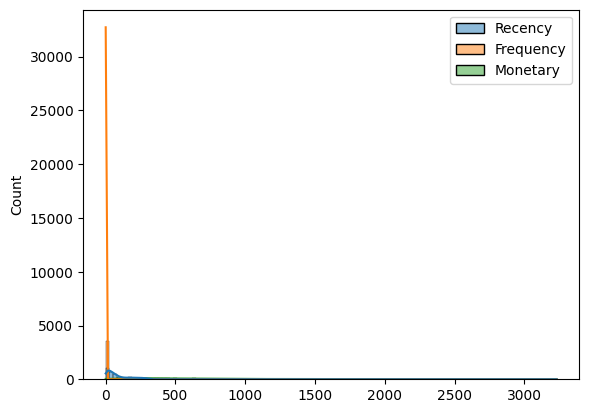

In [41]:
sns.histplot(rfm,kde=True)
plt.show()

As we see the data is not Gaussian so it is better to use Normalization more then standarization

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
rfm_normalize=scaler.fit_transform(rfm)
print(rfm_normalize)

[[0.52564103 1.         0.11439241]
 [0.00641026 0.1        0.40895342]
 [0.23397436 0.         0.06768835]
 ...
 [0.94551282 0.         0.13117117]
 [0.35576923 0.1        0.40061983]
 [0.05448718 0.3        0.72580655]]


In [44]:
# Convert back to DataFrame for readability
rfm_normalize = pd.DataFrame(rfm_normalize, 
                          index=rfm.index, 
                          columns=['Recency', 'Frequency', 'Monetary'])

In [45]:
rfm_normalize

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,0.525641,1.0,0.114392
12347.0,0.006410,0.1,0.408953
12348.0,0.233974,0.0,0.067688
12349.0,0.134615,0.2,0.826662
12351.0,0.032051,0.0,0.092100
...,...,...,...
18283.0,0.054487,0.5,0.190789
18284.0,0.211538,0.0,0.141919
18285.0,0.945513,0.0,0.131171


# Segmentation

# for segmentation we do k-mean clustering 

In [46]:
from sklearn.cluster import KMeans

In [47]:
sse=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_normalize)
    sse.append(kmeans.inertia_)
    

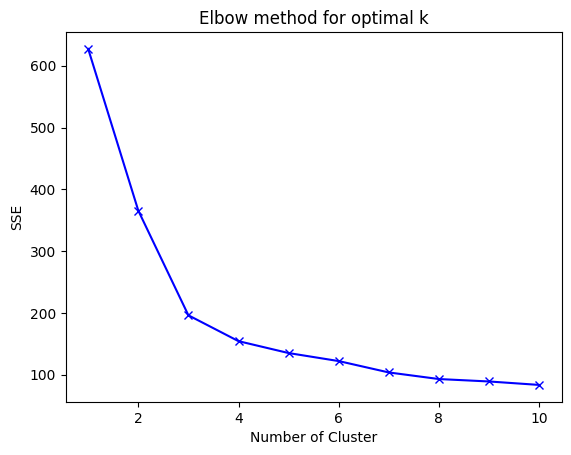

In [48]:
plt.plot(K,sse,'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.title("Elbow method for optimal k")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_normalize)

# Assign clusters
rfm['Cluster'] = kmeans.labels_


In [50]:
cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)


            Recency  Frequency     Monetary
Cluster                                    
0         51.598765   1.689300   417.912724
1         33.707865   7.337079  2237.233018
2         47.820722   3.867288  1317.170407
3        222.902081   1.555692   419.047530


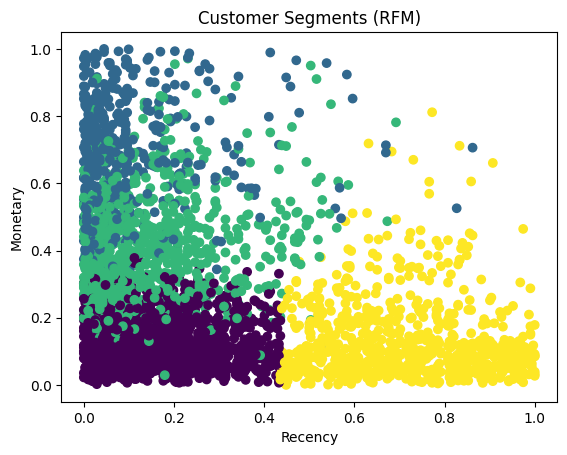

In [51]:
plt.scatter(rfm_normalize['Recency'], rfm_normalize['Monetary'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments (RFM)')
plt.show()

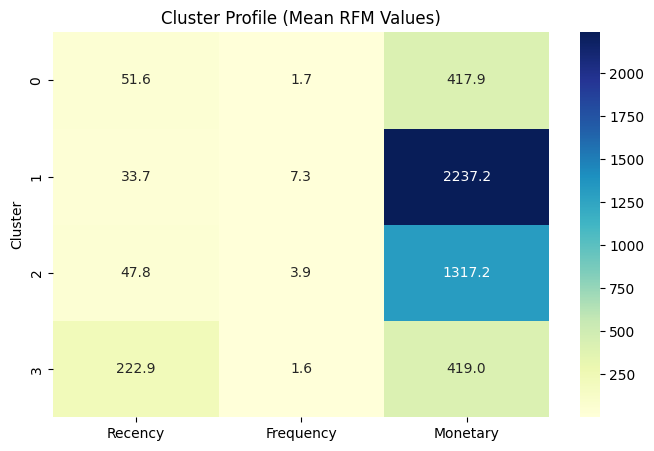

In [52]:
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Profile (Mean RFM Values)")
plt.show()

In [53]:
sales = df.groupby('InvoiceDate')['TotalSales'].sum()

daily_sales = sales.resample('D').sum()
weekly_sales = sales.resample('W').sum()
monthly_sales = sales.resample('ME').sum()

In [54]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,DayOfWeek,TotalSales
0,489434,85048,15Cm Christmas Glass Ball 20 Lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,1,83.40
1,489434,79323P,Pink Cherry Lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1,81.00
2,489434,79323W,White Cherry Lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,1,81.00
3,489434,22041,"Record Frame 7"" Single Size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,1,100.80
4,489434,21232,Strawberry Ceramic Trinket Box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,1,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,Feltcraft Doll Rosie,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010,12,9,20,3,5.90
525457,538171,22750,Feltcraft Princess Lola Doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,12,9,20,3,3.75
525458,538171,22751,Feltcraft Princess Olivia Doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,12,9,20,3,3.75
525459,538171,20970,Pink Floral Feltcraft Shoulder Bag,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,12,9,20,3,7.50


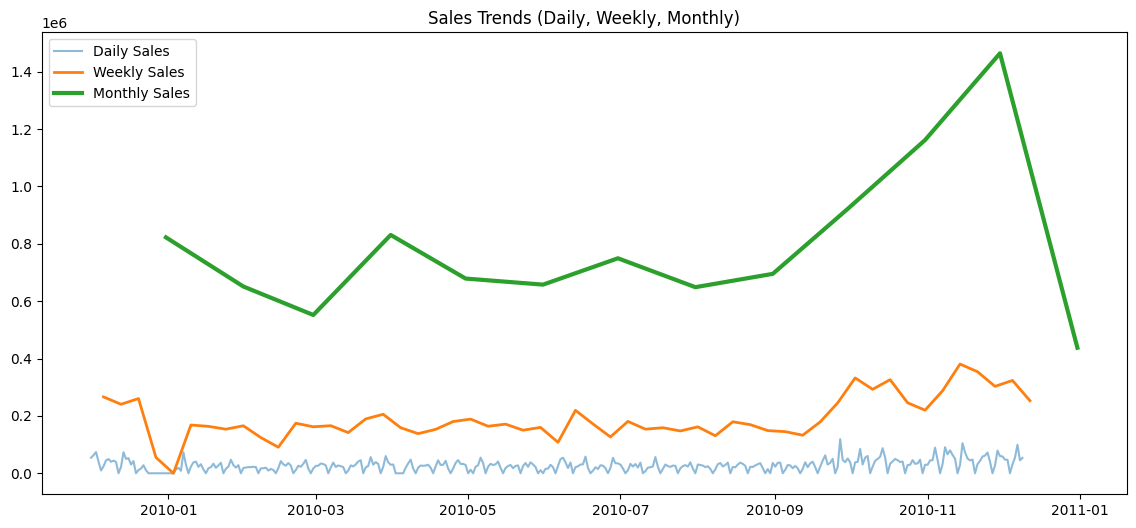

In [55]:

plt.figure(figsize=(14,6))
plt.plot(daily_sales, label="Daily Sales", alpha=0.5)
plt.plot(weekly_sales, label="Weekly Sales", linewidth=2)
plt.plot(monthly_sales, label="Monthly Sales", linewidth=3)
plt.legend()
plt.title("Sales Trends (Daily, Weekly, Monthly)")
plt.show()


# Sales Forecasting

00:14:52 - cmdstanpy - INFO - Chain [1] start processing
00:14:57 - cmdstanpy - INFO - Chain [1] done processing


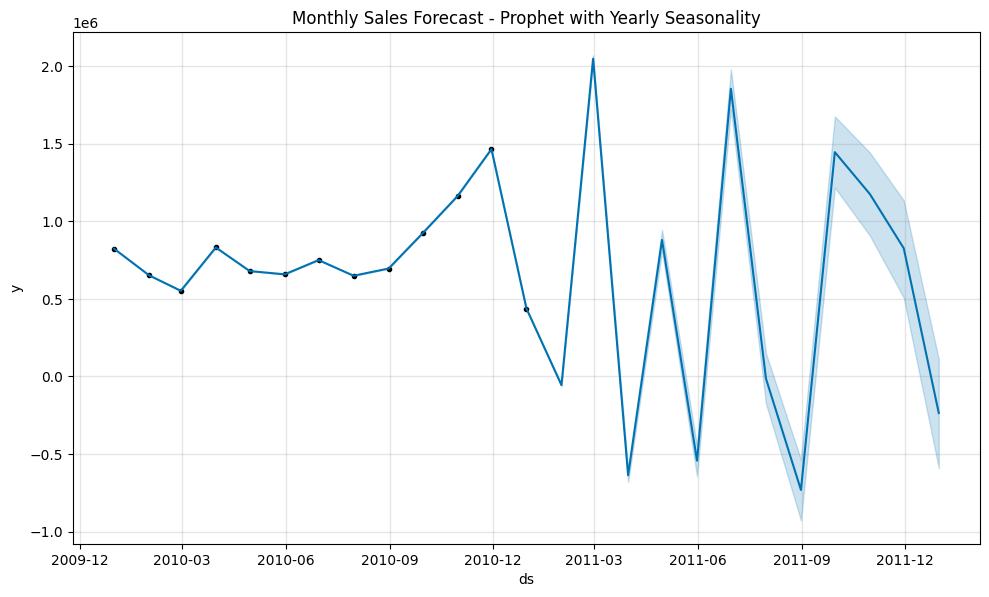

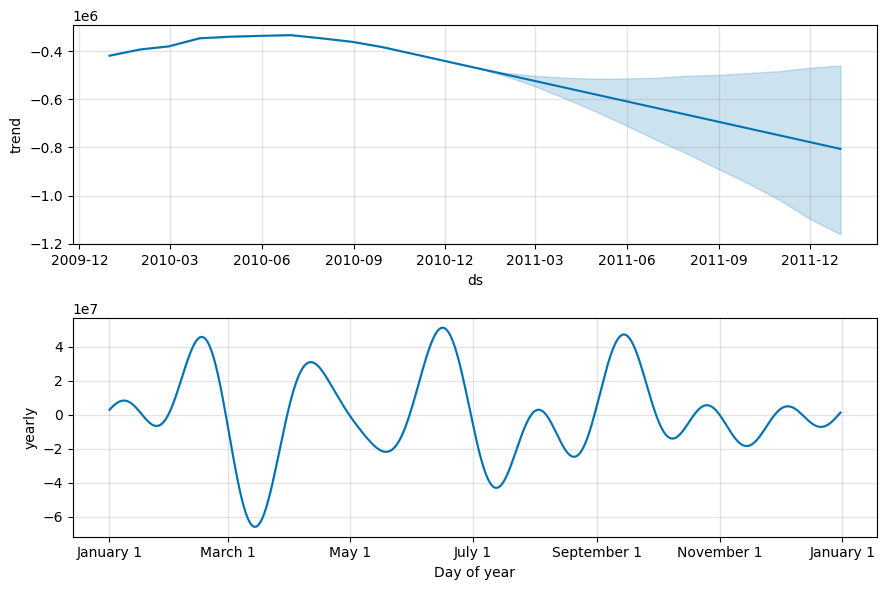

In [82]:
from prophet import Prophet

# Prepare data
df_prophet = monthly_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Add yearly seasonality explicitly
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Fit model
model.fit(df_prophet)

# Make future dataframe (12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title("Monthly Sales Forecast - Prophet with Yearly Seasonality")
plt.show()

# Components
model.plot_components(forecast)
plt.show()


# find out prophet accuracy

In [85]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Prepare Prophet input
df_prophet = monthly_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Train-test split (80-20)
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

# Train Prophet
model = Prophet(yearly_seasonality=True)
model.fit(train)

# Forecast same length as test
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Extract test forecast
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]

# Evaluation
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat']) * 100
rmse = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))

print(f"Prophet -> MAPE: {mape:.2f}%, RMSE: {rmse:.2f}")


00:18:54 - cmdstanpy - INFO - Chain [1] start processing
00:18:55 - cmdstanpy - INFO - Chain [1] done processing


Prophet -> MAPE: 290.77%, RMSE: 2685557.08


ARIMA -> MAPE: 55.85%, RMSE: 441738.59


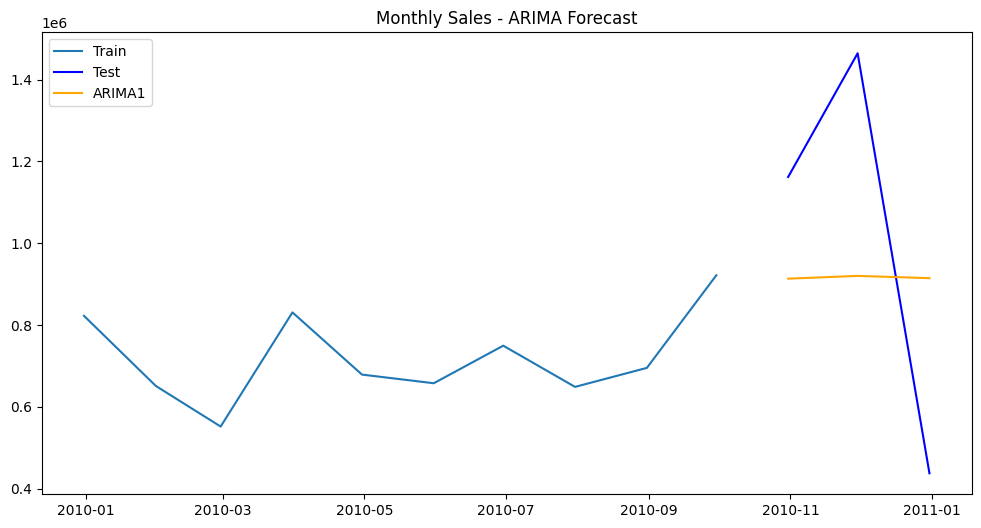

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# --- Train-test split (use last 6 months as test set) ---
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# --- Fit ARIMA model (start with simple order) ---
model = ARIMA(train, order=(1,1,1))  # p,d,q
model_fit = model.fit()

# --- Forecast for test period ---
forecast = model_fit.forecast(steps=len(test))

# --- Evaluation ---
mape = mean_absolute_percentage_error(test, forecast) * 100
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"ARIMA -> MAPE: {mape:.2f}%, RMSE: {rmse:.2f}")

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="blue")
plt.plot(test.index, forecast, label=f"ARIMA{model_fit.model_orders['ar']}", color="orange")
plt.legend()
plt.title("Monthly Sales - ARIMA Forecast")
plt.show()


arima is better then prophet so we stick with ARIMA

# Extend Forecast to Future Periods

In [ ]:
# ARIMA 12 MONTH FORCAST

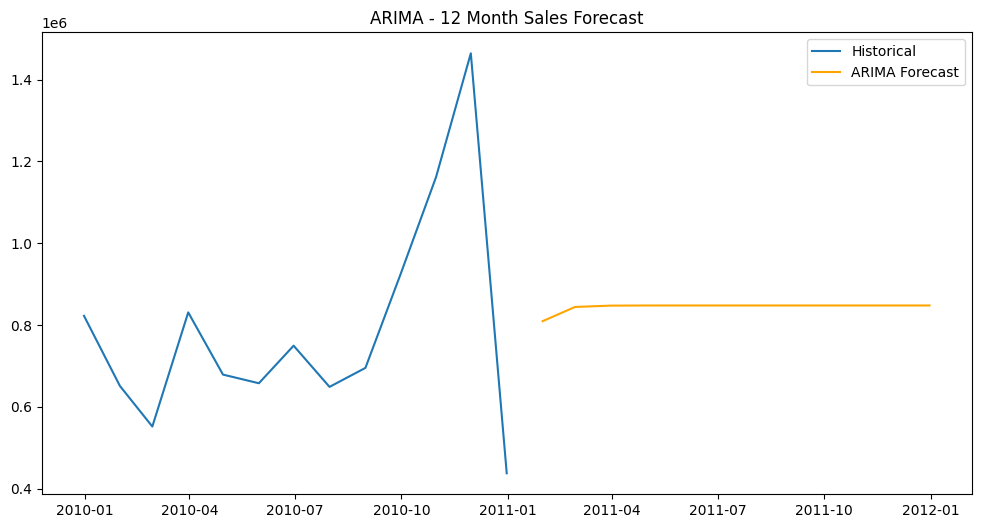

In [86]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA on full data
model = ARIMA(monthly_sales, order=(1,1,1))  # adjust (p,d,q) if tuned
model_fit = model.fit()

# Forecast 12 months ahead
forecast = model_fit.forecast(steps=12)

# Build future index
future_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthEnd(),
                             periods=12, freq='M')
forecast_series = pd.Series(forecast, index=future_index)

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Historical")
plt.plot(forecast_series, label="ARIMA Forecast", color="orange")
plt.legend()
plt.title("ARIMA - 12 Month Sales Forecast")
plt.show()


In [88]:
# prophet 12 month forcast

00:23:01 - cmdstanpy - INFO - Chain [1] start processing
00:23:06 - cmdstanpy - INFO - Chain [1] done processing


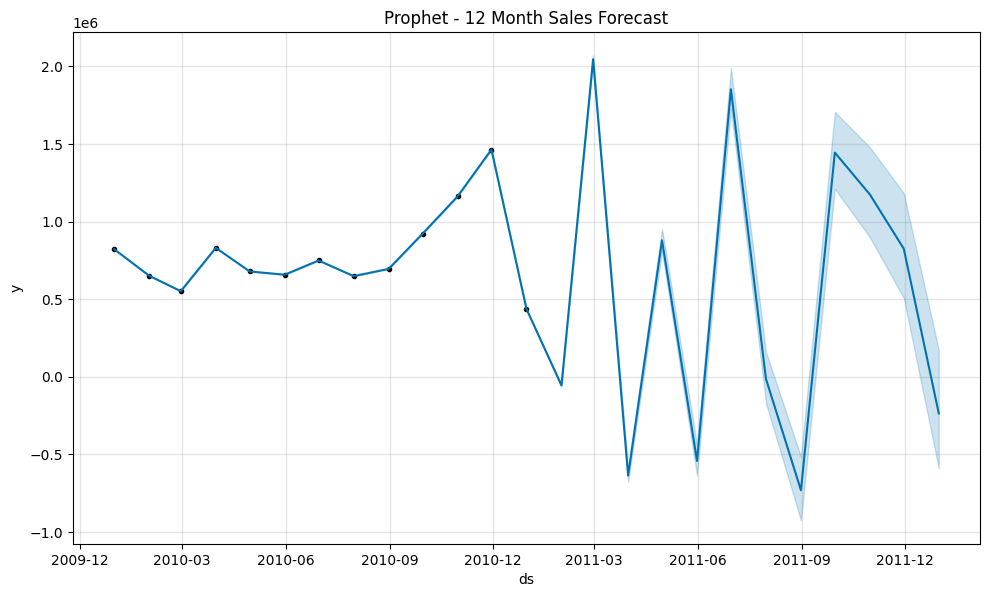

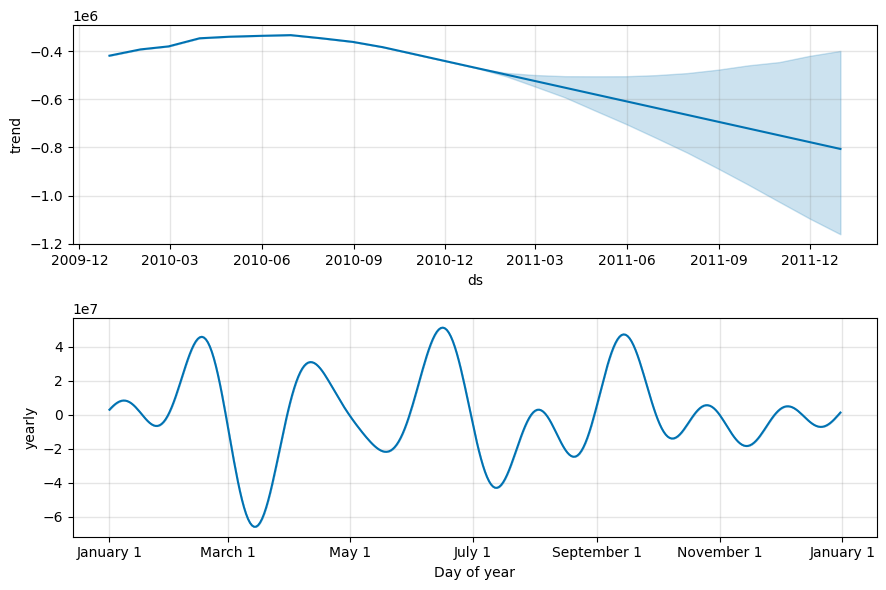

In [87]:
from prophet import Prophet

# Prepare data
df_prophet = monthly_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Fit model
model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

# Forecast 12 months ahead
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title("Prophet - 12 Month Sales Forecast")
plt.show()

# Components (trend + seasonality)
model.plot_components(forecast)
plt.show()


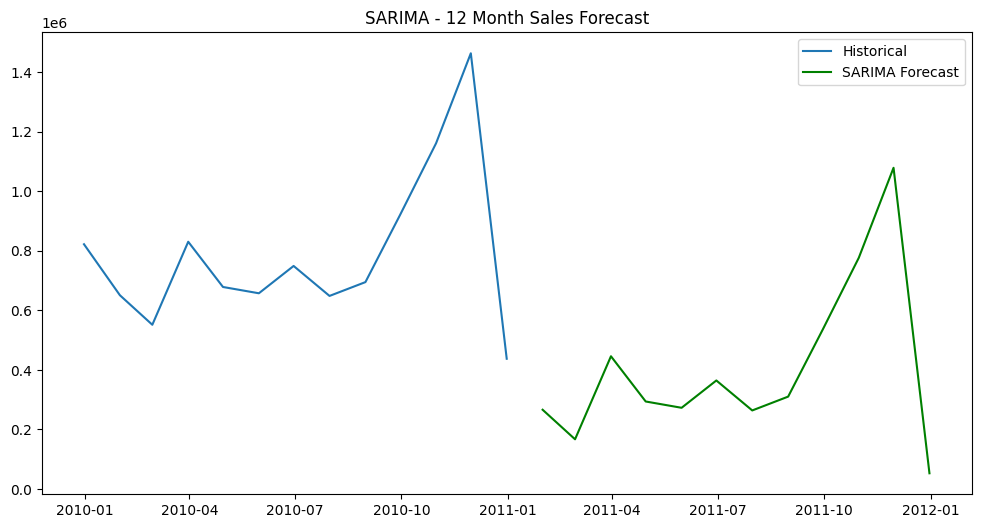

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA on full data
sarima = SARIMAX(monthly_sales,
                 order=(1,1,1),         # p,d,q
                 seasonal_order=(1,1,1,12))  # P,D,Q,m (12 = yearly seasonality)
sarima_fit = sarima.fit()

# Forecast 12 months ahead
sarima_forecast = sarima_fit.forecast(steps=12)
sarima_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthEnd(),
                             periods=12, freq='M')

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Historical")
plt.plot(sarima_forecast.index, sarima_forecast.values, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("SARIMA - 12 Month Sales Forecast")
plt.show()


# Export Data from Python to CSV/Excel

In [90]:
# 1. Historical Sales (daily, weekly, monthly)
monthly_sales.to_csv("monthly_sales.csv")


In [91]:
# 2. Forecasts (from ARIMA/SARIMA/Prophet)
forecast_df = forecast_series.reset_index()
forecast_df.columns = ["Date", "Forecast"]
forecast_df.to_csv("forecast_sales.csv", index=False)

In [94]:
# 3. RFM Segmentation
rfm.to_csv("rfm_segments.csv")


In [93]:
# 4. Cleaned Main Dataset (optional, for product/country analysis)
df.to_csv("cleaned_sales_data.csv", index=False)